In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from utils.matplotlib_visualization_utils import plot_contour2d, plot_data2d, plot_data1d, plot_data1d_histogram
from utils.matplotlib_visualization_utils import plot_kde2d_summary

from ConfigParser import SafeConfigParser

In [2]:
mpl_plot_config_fname = 'mpl_plot.cfg'

In [3]:
parser = SafeConfigParser()
parser.read(mpl_plot_config_fname)

evttypes = map(int, parser.get('individual', 'evttypes').split())
training_data_dir = parser.get('individual', 'training_data_dir')
mpl_data_dir = parser.get('individual', 'mpl_data_dir')

scatter_fin_template = parser.get('individual', 'scatter_fin_template')
training_fin_template = parser.get('individual', 'training_fin_template')
kde2d_fin_template = parser.get('individual', 'kde2d_fin_template')
kde1dx_fin_template = parser.get('individual', 'kde1dx_fin_template')
kde1dy_fin_template = parser.get('individual', 'kde1dy_fin_template')

kde2d_fout_template = parser.get('individual', 'kde2d_fout_template')
kde1dx_fout_template = parser.get('individual', 'kde1dx_fout_template')
kde1dy_fout_template = parser.get('individual', 'kde1dy_fout_template')

plot_scatter = bool(int(parser.get('individual', 'plot_scatter')))
save_fig = bool(int(parser.get('individual', 'save_fig')))

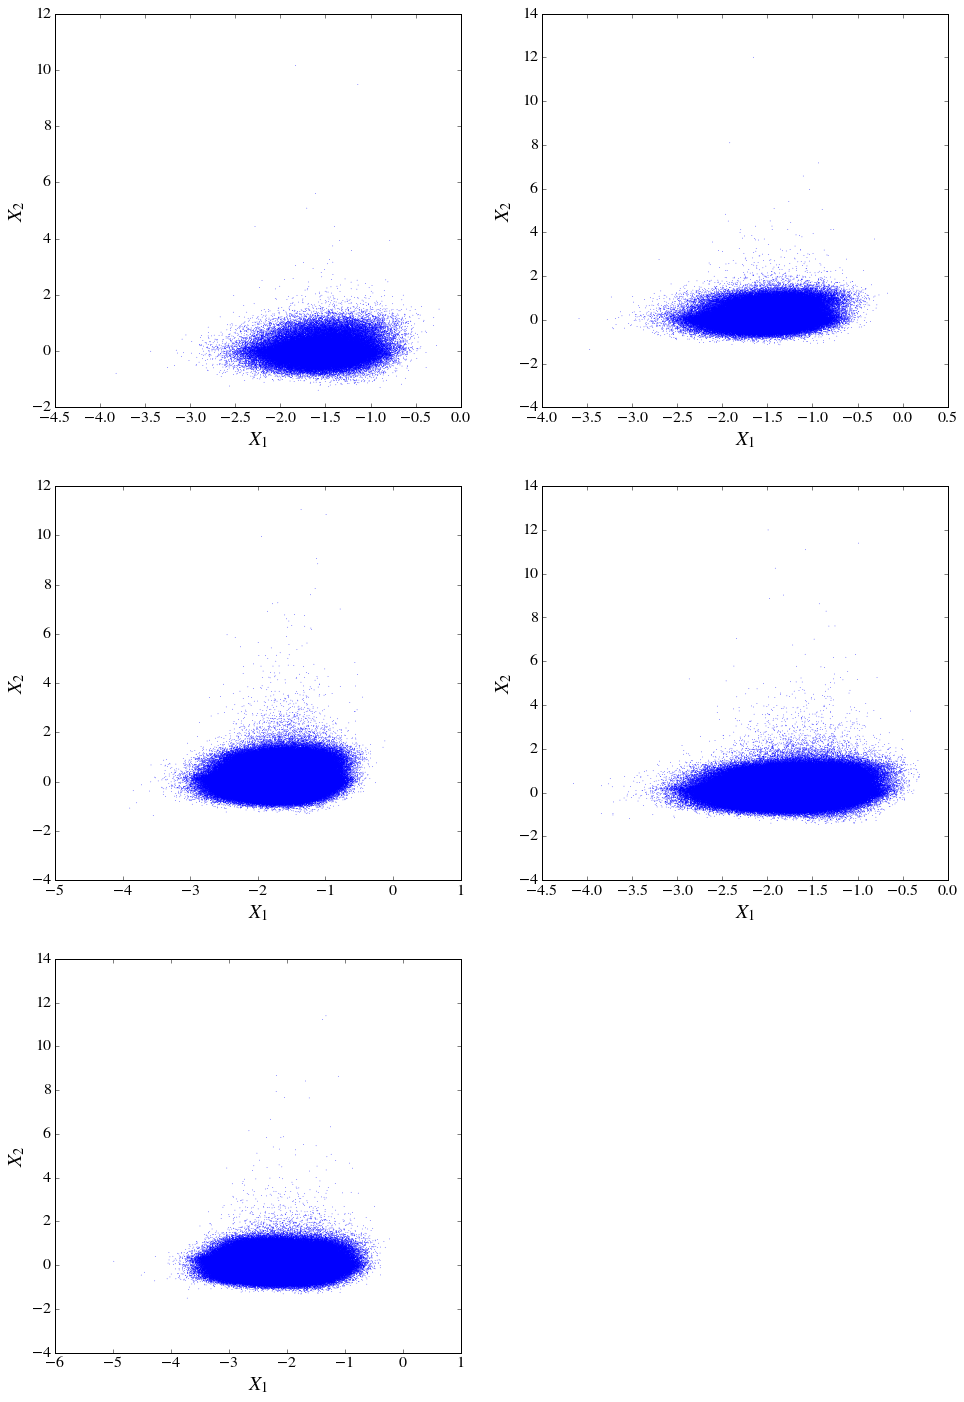

In [4]:
if plot_scatter:
    figsize = (3,2)
    fig = plt.figure(figsize=(8*figsize[1],8*figsize[0]))
    for i in evttypes:
        ax = fig.add_subplot(figsize[0], figsize[1], i)
        plot_data2d(mpl_data_dir+'/'+scatter_fin_template.format(i), ax=ax, marker='.', s=2)

/home/jkim/Software/anaconda/lib/python2.7/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


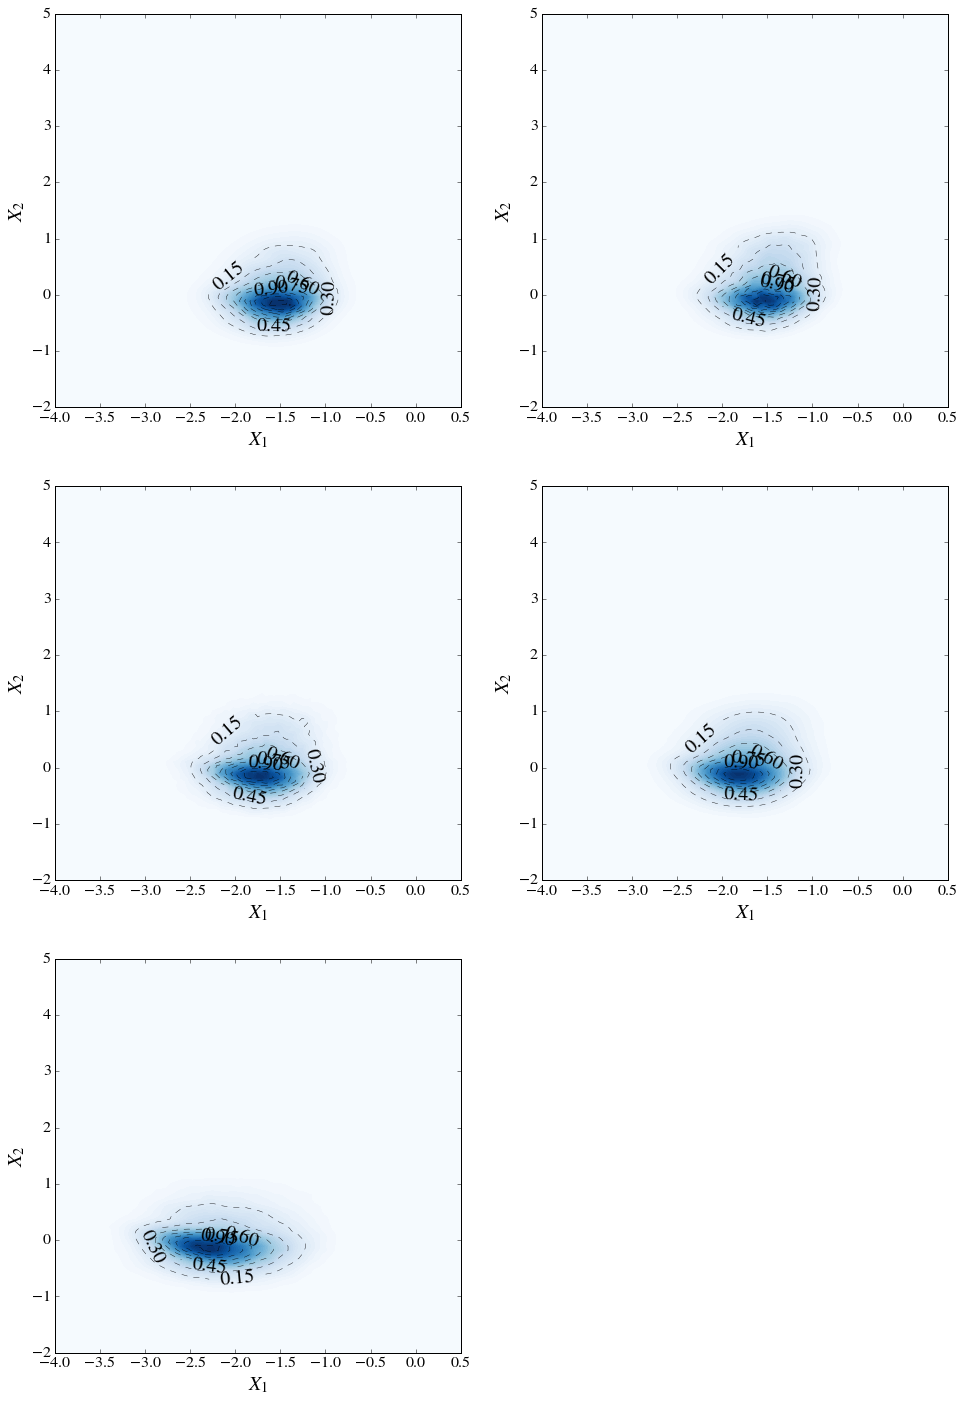

In [5]:
figsize = (3,2)
fig = plt.figure(figsize=(8*figsize[1],8*figsize[0]))
for i in evttypes:
    ax = fig.add_subplot(figsize[0], figsize[1], i)
    plot_contour2d(mpl_data_dir+'/'+kde2d_fin_template.format(i), ax=ax, nlevels=10, colorbar=False)

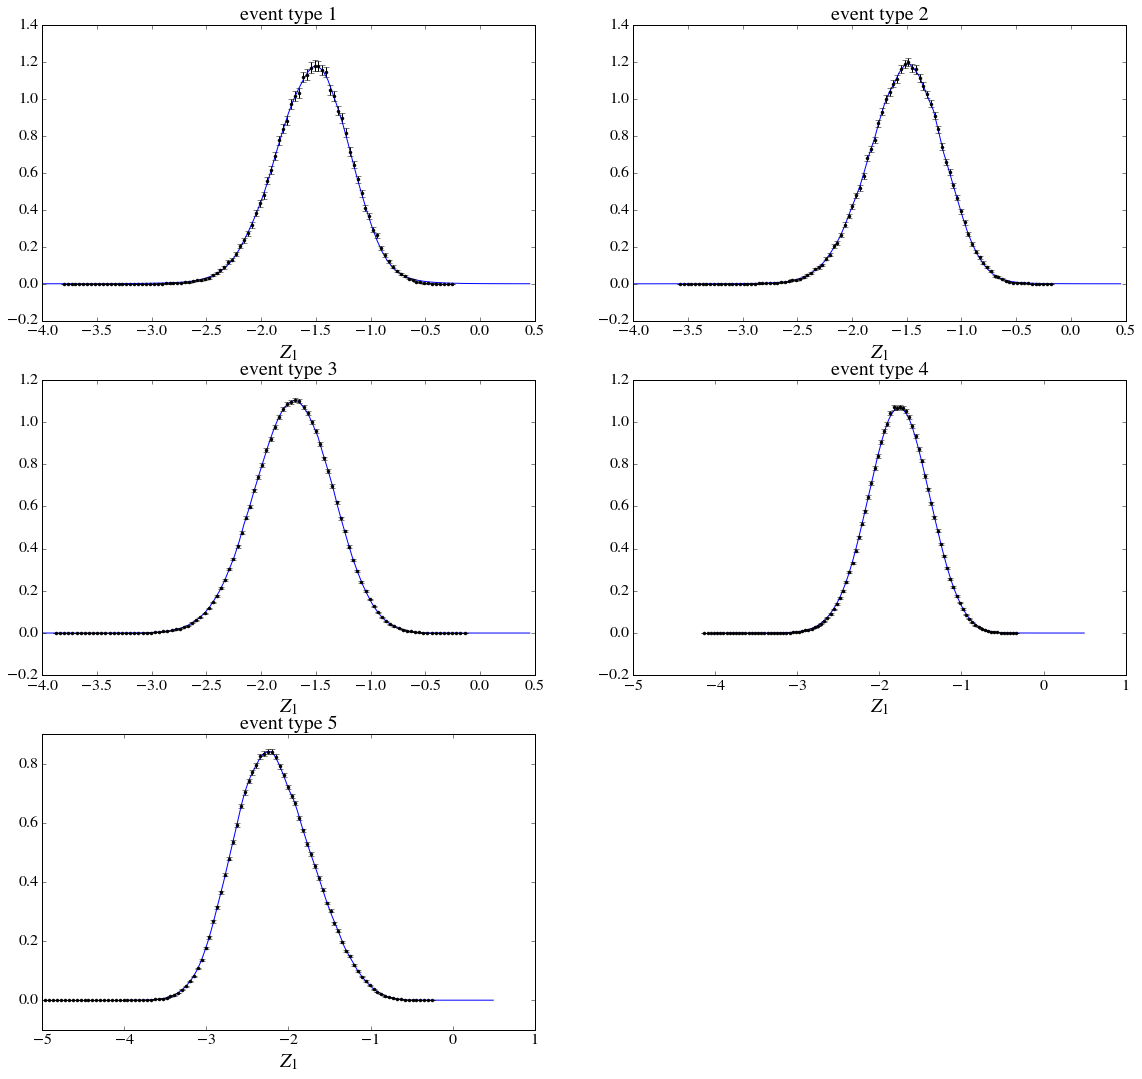

In [6]:
figsize = (3,2)
fig = plt.figure(figsize=(6*1.618*figsize[1],6*figsize[0]))
for i in evttypes:
    arr = np.genfromtxt(training_data_dir+'/'+training_fin_template.format(i))
    ax = fig.add_subplot(figsize[0], figsize[1], i)
    plot_data1d(mpl_data_dir+'/'+kde1dx_fin_template.format(i), ax=ax, xlabel=r'$Z_1$', title='event type {0}'.format(i))
    plot_data1d_histogram(arr[:,0], weights=arr[:,2],bins=100,normed=True, 
                          ax=ax, xlabel=r'$Z_1$', title='event type {0}'.format(i));

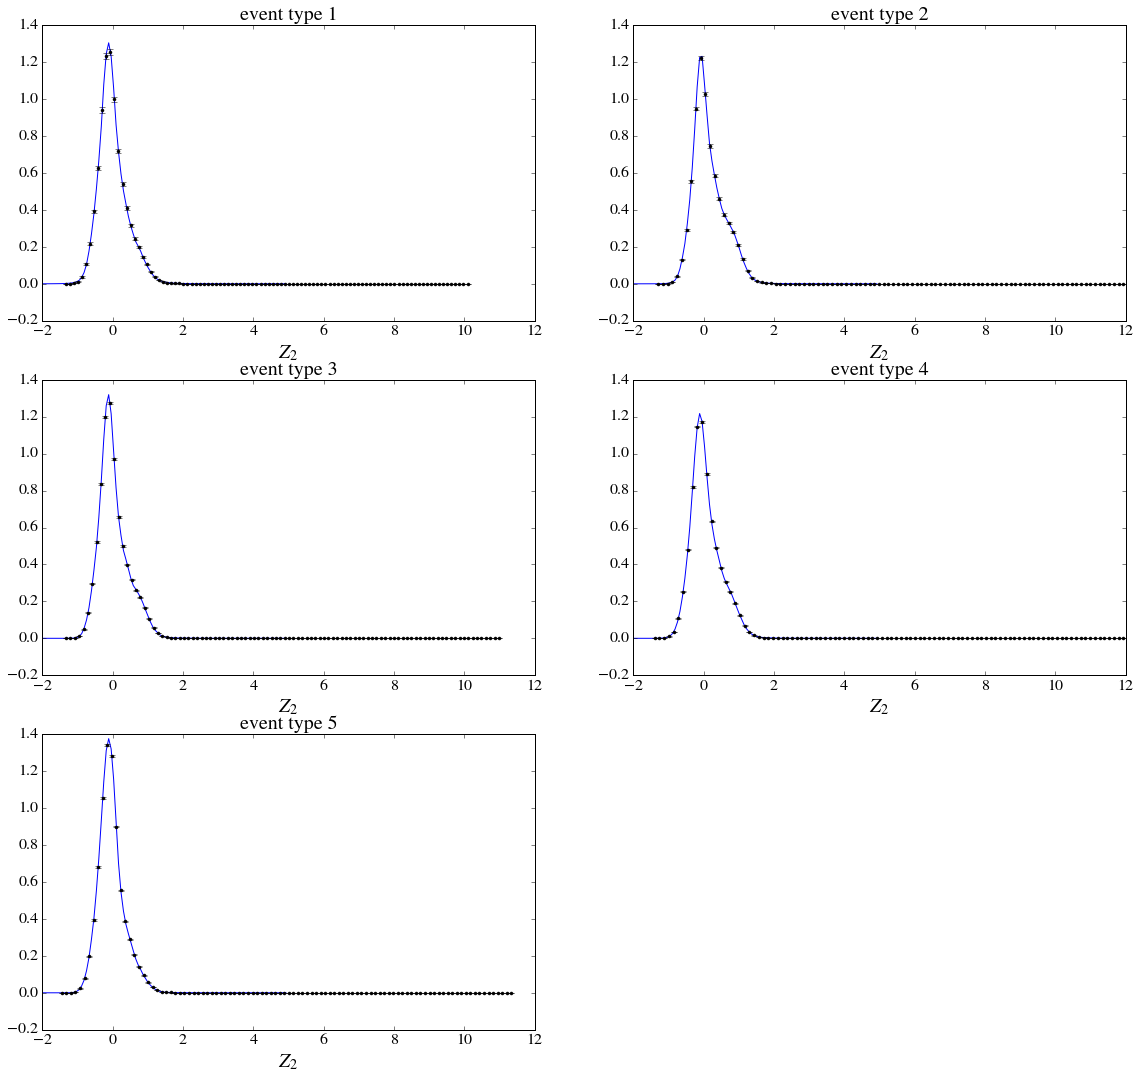

In [7]:
figsize = (3,2)
fig = plt.figure(figsize=(6*1.618*figsize[1],6*figsize[0]))
for i in evttypes:
    arr = np.genfromtxt(training_data_dir+'/'+training_fin_template.format(i))
    ax = fig.add_subplot(figsize[0], figsize[1], i)
    plot_data1d(mpl_data_dir+'/'+kde1dy_fin_template.format(i), ax=ax, xlabel=r'$Z_2$', title='event type {0}'.format(i))
    plot_data1d_histogram(arr[:,1], weights=arr[:,2],bins=100,normed=True, ax=ax,
                          xlabel=r'$Z_2$', title='event type {0}'.format(i));

In [8]:
if save_fig:
    for i in evttypes:
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(1,1,1)
        plot_contour2d(mpl_data_dir+'/'+kde2d_fin_template.format(i), ax=ax, 
                       nlevels=10, colorbar=False,
                       xlabel=r'$Z_1$', ylabel=r'$Z_2$', title='Event type {0}'.format(i))
        fig.savefig(kde2d_fout_template.format(i))

In [9]:
if save_fig:
    for i in evttypes:
        fig = plt.figure(figsize=(6*1.618,6))
        arr = np.genfromtxt(training_data_dir+'/'+training_fin_template.format(i))
        ax = fig.add_subplot(1,1,1)
        plot_data1d(mpl_data_dir+'/'+kde1dx_fin_template.format(i), ax=ax, xlabel=r'$Z_1$', title='Event type {0}'.format(i))
        plot_data1d_histogram(arr[:,0], weights=arr[:,2],bins=100,normed=True, ax=ax,
                              xlabel=r'$Z_1$', title='Event type {0}'.format(i));
        fig.savefig(kde1dx_fout_template.format(i))

In [10]:
if save_fig:
    for i in evttypes:
        fig = plt.figure(figsize=(6*1.618,6))
        arr = np.genfromtxt(training_data_dir+'/'+training_fin_template.format(i))
        ax = fig.add_subplot(1,1,1)
        plot_data1d(mpl_data_dir+'/'+kde1dy_fin_template.format(i), ax=ax, xlabel=r'$Z_2$', title='event type {0}'.format(i))
        plot_data1d_histogram(arr[:,1], weights=arr[:,2],bins=100,normed=True, ax=ax,
                              xlabel=r'$Z_2$', title='event type {0}'.format(i));
        fig.savefig(kde1dy_fout_template.format(i))